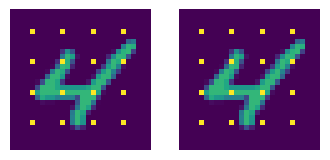

In [1]:
import torch
from datasets import load_dataset, get_observation_pixels
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

from config import load_config, get_model_name
config = load_config("VQVAE")

train_loader, test_loader, val_loader = load_dataset(config["data_params"])

model_name = get_model_name(config)

from plotting import plot_sample_with_conditioned_pixels

x, x_cond, y = next(iter(train_loader))

plot_sample_with_conditioned_pixels(x[0][0])

In [2]:
from trainers import SuperTrainer, VAEModule

model = VAEModule(config['model_params'], model_name=config['model_name'])

from trainers import SuperTrainer
trainer = SuperTrainer(**config['trainer_params'], model_name=model_name)
trainer.fit(model, train_loader, val_loader)
#save
trainer.save_model_checkpoint()

/Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/pyt ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable cod

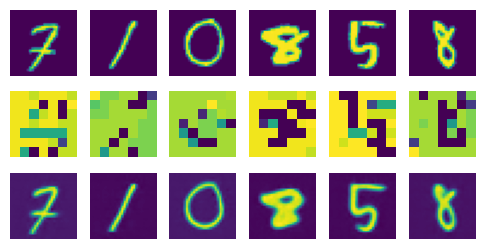

In [3]:
from trainers import VAEModule
model = VAEModule.load_model_checkpoint(model_name)

from plotting import plot_samples_with_reconstruction_and_indices
plot_samples_with_reconstruction_and_indices(model, next(iter(test_loader)), save_name=model_name)

In [4]:
from trainers import SuperTrainer, PixelCNNModule

pixel_cnn_model_name = "Pixel_CNN_" + model_name
model = PixelCNNModule(vae_name=model_name)

from trainers import SuperTrainer
trainer = SuperTrainer(**config['trainer_params'], model_name = pixel_cnn_model_name)
trainer.fit(model, train_loader, val_loader)
#save
trainer.save_model_checkpoint()

/Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/pyt ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/Pixel_CNN_VQVAE(128_16)?dataset=MNIST&batch_size=128&max_epochs=50


/Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory /Home/siv34/edzak2974/projects/MastersThesis/src/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | SimplePixelCNN   | 1.8 M 
1 | vae       | VAEModule        | 9.3 M 
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
908 K     Trainable params
10.2 M    Non-trainable params
11.1 M    Total params
44.276    Total estimated model params size (MB)


Epoch 49: 100%|██████████| 469/469 [00:05<00:00, 80.88it/s, v_num=0toy, train_loss=0.776, val_loss=0.799] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 469/469 [00:05<00:00, 80.85it/s, v_num=0toy, train_loss=0.776, val_loss=0.799]


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss,█▆▅▅▃▃▃▃▃▂▃▃▃▂▃▂▂▂▁▁▂▂▁▂▂▁▂▂▁▁▂▂▂▂▁▂▁▁▁▂
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
train_loss,0.77553
trainer/global_step,23449
val_loss,0.79891


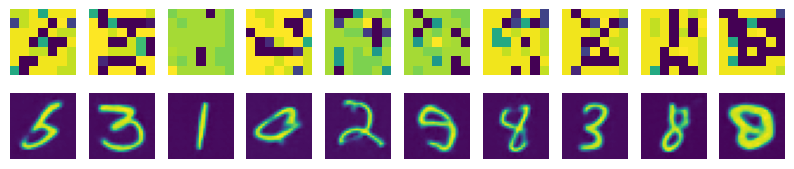

In [5]:
model = PixelCNNModule.load_model_checkpoint(pixel_cnn_model_name, vae_name = model_name)
from plotting import generate_indices_and_reconstruct
        
generate_indices_and_reconstruct(model, save_name=pixel_cnn_model_name)